In [1]:
import pandas as pd
import matplotlib.pyplot as plt
 

In [3]:
df = pd.read_csv(r'..\data_storage\processed\heartProcessed.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


## Outlier Removal

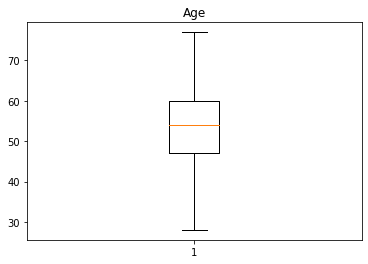

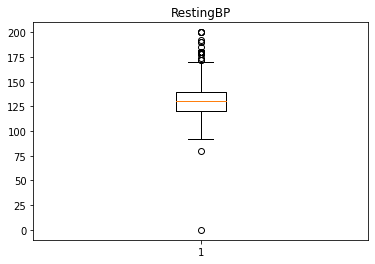

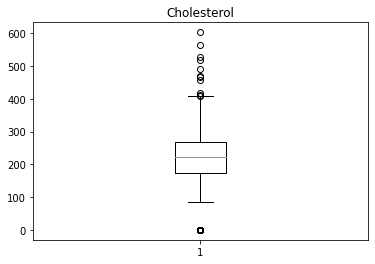

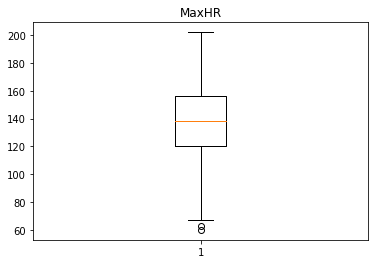

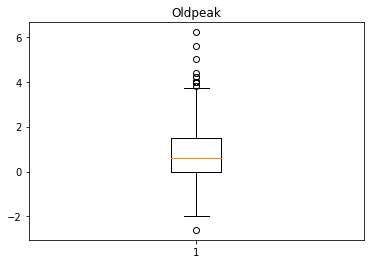

In [16]:
# Plotting out Boxplot to check outliers 

cols = [  "Age","RestingBP","Cholesterol","MaxHR","Oldpeak" ]
for col in cols:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()


In [18]:
outlier_cols = ["RestingBP","Cholesterol","Oldpeak"]
for i in outlier_cols:
    print(  df[i].describe() )

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64
count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64
count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64


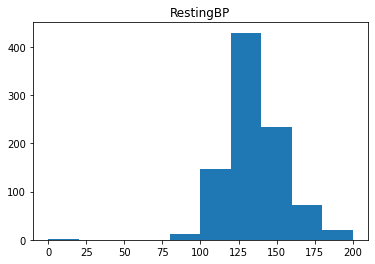

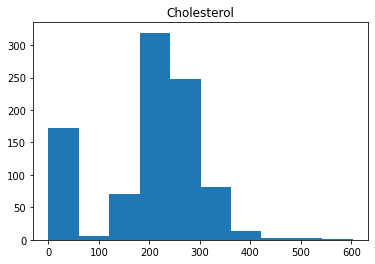

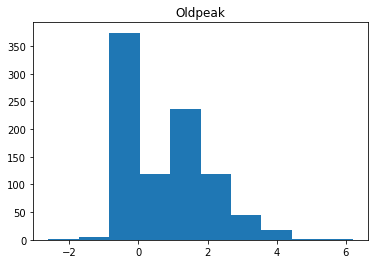

In [19]:
for i in outlier_cols:
    plt.hist(  df[i] )
    plt.title(i)
    plt.show()

#### As we can see from above graphs the features normality is geting affected on the lower side. In the next steps we will work in removing these outliers

In [25]:
for col in outlier_cols:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)

    Lower_fence = df[col].quantile(0.25) - (IQR * 1.5)
    Upper_fence = df[col].quantile(0.75) + (IQR * 1.5)
    print("Col     Low_F    Len")
    print(col, Lower_fence ,len(df[ df[col]<Lower_fence  ]  )  )

    print("Col     Upper_F    Len")
    print(col, Upper_fence ,len(df[ df[col]>Upper_fence  ]  )  )


Col     Low_F    Len
RestingBP 90.0 2
Col     Upper_F    Len
RestingBP 170.0 26
Col     Low_F    Len
Cholesterol 32.625 172
Col     Upper_F    Len
Cholesterol 407.625 11
Col     Low_F    Len
Oldpeak -2.25 1
Col     Upper_F    Len
Oldpeak 3.75 15
